# S(E)IR-model 

Het SIR-model is een eenvoudig ziektecompartimentenmodel.
- S(t) (vatbaar; susceptible)
- I(t) (besmettelijk; infectious)
- R(t) (genezen; recovered)
- ---------------------------
- s(t) = (-(5x10^-9)/day*person) * i(t) * s(t)
- i(t) = ((5x10^-9)/day*person) * i(t) * s(t) - (1/5days * i(t))
- e(t) = 
- r(t) = 1/5days * i(t)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
stnr = 1748884
def sir_model(stnr):
    populatie = int(str(stnr)[-2:]) * 1000000
    contacten = int(str(stnr)[3:-2]) 
    kans_infectie = float(str(stnr)[2])/100
    return populatie,contacten,kans_infectie

populatie, contacten,kans_infectie = sir_model(stnr)

In [16]:
print("De grootte van de populatie wordt {}, het gemiddelde aantal contacten per dag {} en de kans op infectie {}".format(populatie,contacten,kans_infectie))

De grootte van de populatie wordt 84000000, het gemiddelde aantal contacten per dag 88 en de kans op infectie 0.04


In [17]:
h = 0.5 #days
trans_coeff = (kans_infectie * contacten) / populatie #day person
infectie_tijd = 5 #days 

end_time = 60 #days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

In [50]:
def seir_model(latency_time):  
    s = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)
    
    s[0] = populatie - 1e6 - 1e5 - 0 
    e[0] = 0
    i[0] = 1e5
    r[0] = 1e6
    
    for step in range(num_steps): 
        s2e = h * trans_coeff * s[step] * i[step]
        e2i = h / latency_time * e[step]
        i2r = h / infectie_tijd * i[step]
        
        s[step+1] = s[step] - s2e
        e[step+1] = e[step] + s2e - e2i 
        i[step+1] = i[step] + e2i - i2r
        r[step+1] = r[step] + i2r
        
    return s,e,i,r 

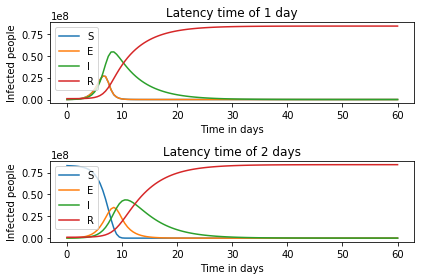

In [51]:
def plot_me():
    ax1 = plt.subplot(211)
    ax1.set_title('Latency time of 1 day')
    plt.plot(times, e, label='S')
    plt.plot(times, e, label='E')
    plt.plot(times, i, label='I')
    plt.plot(times, r, label='R')
    plt.legend(loc="upper left")
    ax1.set(xlabel="Time in days",ylabel="Infected people")
    
    ax2 = plt.subplot(212)
    ax2.set_title('Latency time of 2 days')
    plt.plot(times, s_2, label='S')
    plt.plot(times, e_2, label='E')
    plt.plot(times, i_2, label='I')
    plt.plot(times, r_2, label='R')
    plt.legend(loc="upper left")
    ax2.set(xlabel="Time in days",ylabel="Infected people")

    plt.tight_layout()
    
s,e,i,r = seir_model(1)
s_2,e_2,i_2,r_2 = seir_model(2)

plot_me()
plt.show()

** i en r lopen na een tijd parallel **

### Hoeveel mensen moeten gevaccineerd worden om een epidemie te voorkomen?
(Een epidemie houdt na een tijdje vanzelf op, omdat het aantal vatbare personen te sterk afgenomen is.)


In [27]:
# s(t) zijn de mensen die vatbaar zijn en daarom gevaccineerd moeten worden om een ziekte te voorkomen.

In [54]:
s_t = populatie - 1e6 - 1e5 - 0 #s[0]
s_t

82900000.0